The dataset, customer_booking.csv, contains information related to customer bookings for airline tickets. It includes details about the sales channel, trip type, flight day, route, booking origin, and other flight-related attributes. This dataset can be used to analyze customer behavior, booking trends, and preferences.

The main goal of this analysis is to apply K-Means clustering to segment customers based on their booking patterns. The insights can help airlines:

Identify different types of travelers (e.g., business, leisure, frequent flyers).
Optimize marketing strategies for each segment.
Improve customer service by understanding booking preferences.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("C:/Users/Sumit Emmanuel/Machine_Learning_Lab/customer_booking.csv", encoding="ISO-8859-1")
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [11]:
print("Dataset Information:")
print(df.info())


print("\nFirst 5 Rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   num_passengers         599 non-null    int64 
 1   sales_channel          599 non-null    object
 2   trip_type              599 non-null    object
 3   purchase_lead          599 non-null    int64 
 4   length_of_stay         599 non-null    int64 
 5   flight_hour            599 non-null    int64 
 6   flight_day             599 non-null    object
 7   route                  599 non-null    object
 8   booking_origin         599 non-null    object
 9   wants_extra_baggage    599 non-null    int64 
 10  wants_preferred_seat   599 non-null    int64 
 11  wants_in_flight_meals  599 non-null    int64 
 12  flight_duration        599 non-null    int64 
 13  booking_complete       599 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 65.6+ KB
None

F

In [12]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [13]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count      599.000000     599.000000      599.000000   599.000000   
mean         1.631052     135.707846       41.282137     9.363940   
std          1.076864     107.394499       41.771822     5.712841   
min          1.000000       0.000000        1.000000     0.000000   
25%          1.000000      43.500000       20.000000     5.000000   
50%          1.000000     107.000000       26.000000     9.000000   
75%          2.000000     214.000000       42.500000    13.000000   
max          9.000000     419.000000      305.000000    23.000000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count           599.000000            599.000000             599.000000   
mean              0.739566              0.202003               0.424040   
std               0.439238              0.401830               0.494609   
min               0.000000              0.000000         

In [14]:
# Show unique values for categorical columns
categorical_cols = ["sales_channel", "trip_type", "flight_day", "route", "booking_origin"]
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].nunique()}")
    print(df[col].unique())


Unique values in sales_channel: 2
['Internet' 'Mobile']

Unique values in trip_type: 3
['RoundTrip' 'CircleTrip' 'OneWay']

Unique values in flight_day: 7
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']

Unique values in route: 7
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL']

Unique values in booking_origin: 35
['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'R\x82union' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal']


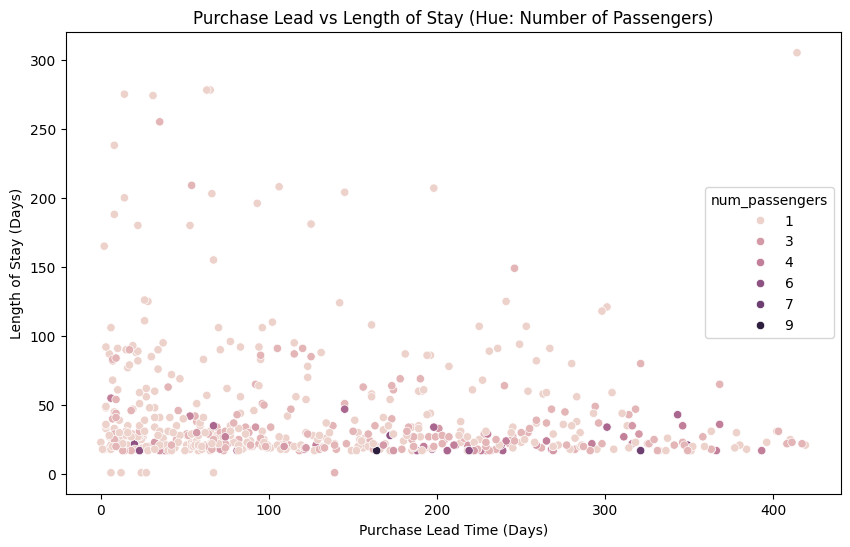

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["purchase_lead"], y=df["length_of_stay"], hue=df["num_passengers"])
plt.title("Purchase Lead vs Length of Stay (Hue: Number of Passengers)")
plt.xlabel("Purchase Lead Time (Days)")
plt.ylabel("Length of Stay (Days)")
plt.show()


Passengers who book earlier (high purchase lead time) tend to stay longer.
Last-minute bookings often correlate with short stays.

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12788\2112801146.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["trip_type"], y=df["num_passengers"], ci=None, palette="coolwarm")
C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12788\2112801146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["trip_type"], y=df["num_passengers"], ci=None, palette="coolwarm")


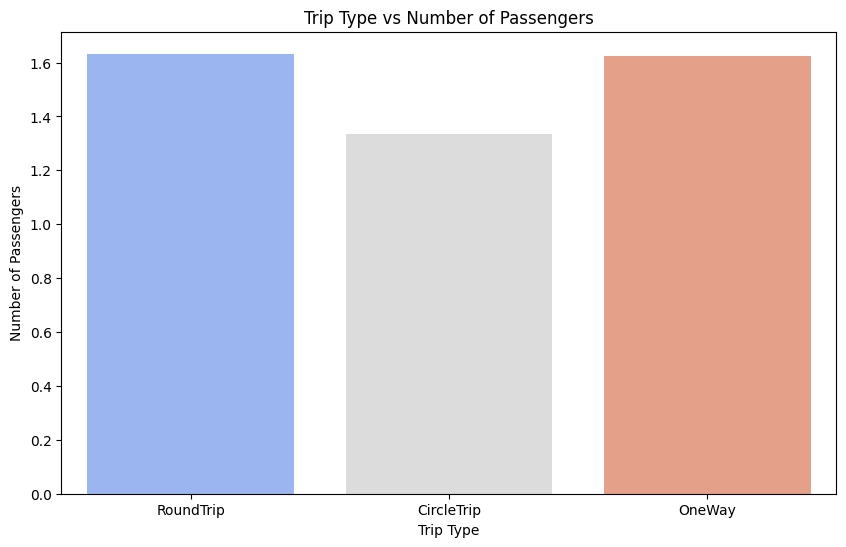

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["trip_type"], y=df["num_passengers"], ci=None, palette="coolwarm")
plt.title("Trip Type vs Number of Passengers")
plt.xlabel("Trip Type")
plt.ylabel("Number of Passengers")
plt.show()


If round trips have more passengers than one-way, it suggests business or planned travel.
If one-way trips dominate, this may indicate migratory or emergency travel.

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12788\2545801908.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["flight_day"], y=df["num_passengers"], ci=None, palette="viridis")
C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12788\2545801908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["flight_day"], y=df["num_passengers"], ci=None, palette="viridis")


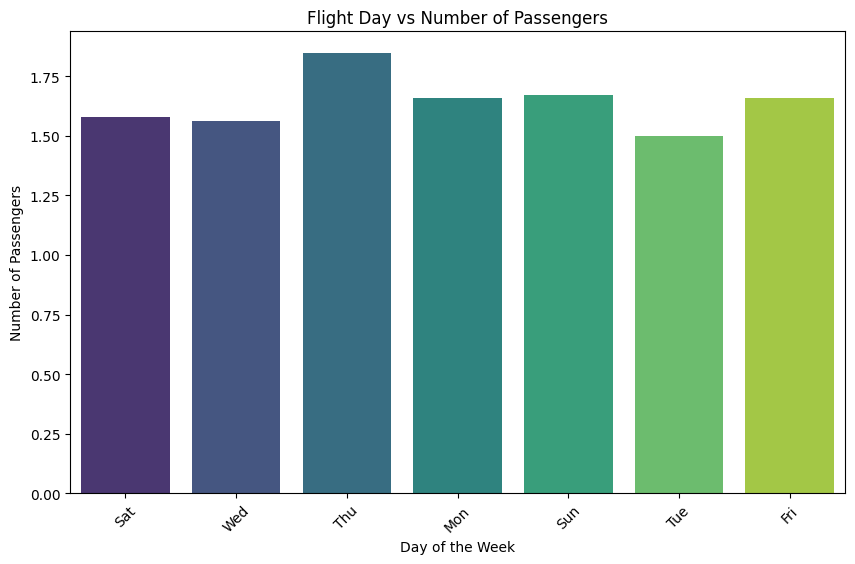

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["flight_day"], y=df["num_passengers"], ci=None, palette="viridis")
plt.title("Flight Day vs Number of Passengers")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.show()


More passengers on Fridays and Sundays indicate weekend travelers.
Lower demand on midweek days suggests fewer business travelers.

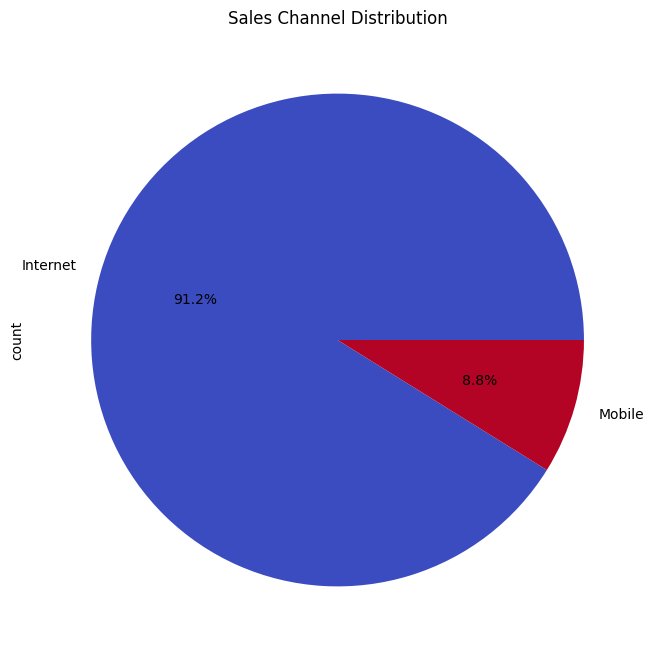

In [32]:
plt.figure(figsize=(8, 8))
df["sales_channel"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm")
plt.title("Sales Channel Distribution")
plt.show()


Airlines should invest in mobile-friendly websites if online bookings are high.
If offline bookings are large, they can offer special deals to agents.


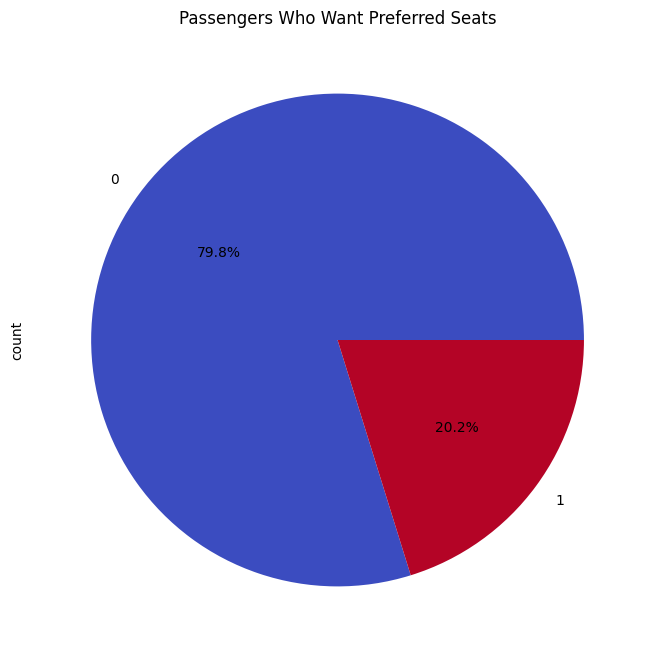

In [33]:
plt.figure(figsize=(8, 8))
df["wants_preferred_seat"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm")
plt.title("Passengers Who Want Preferred Seats")
plt.show()


If many passengers prefer specific seats, they are willing to pay extra.

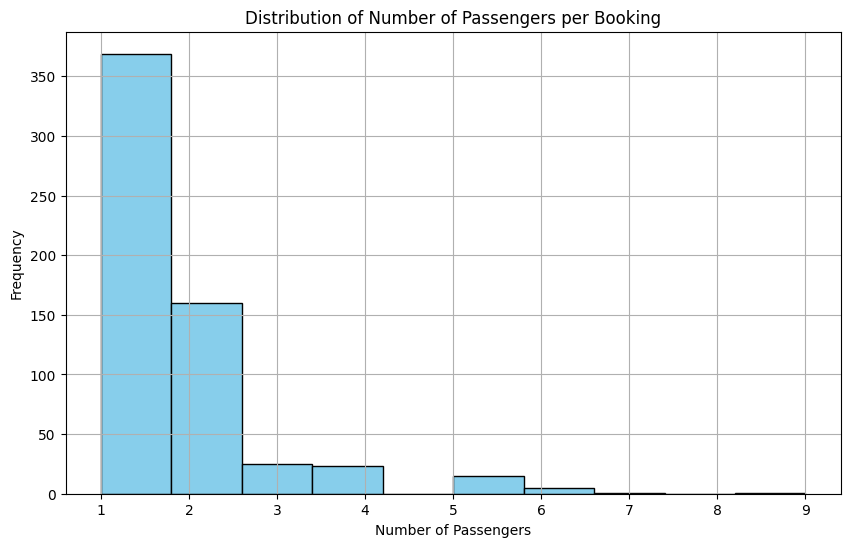

In [35]:
plt.figure(figsize=(10, 6))
df["num_passengers"].hist(bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Number of Passengers per Booking")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()


If most bookings are for single travelers, the airline serves solo travelers.
If many solo travelers exist, airlines can offer bundle deals (seat + meal + baggage).

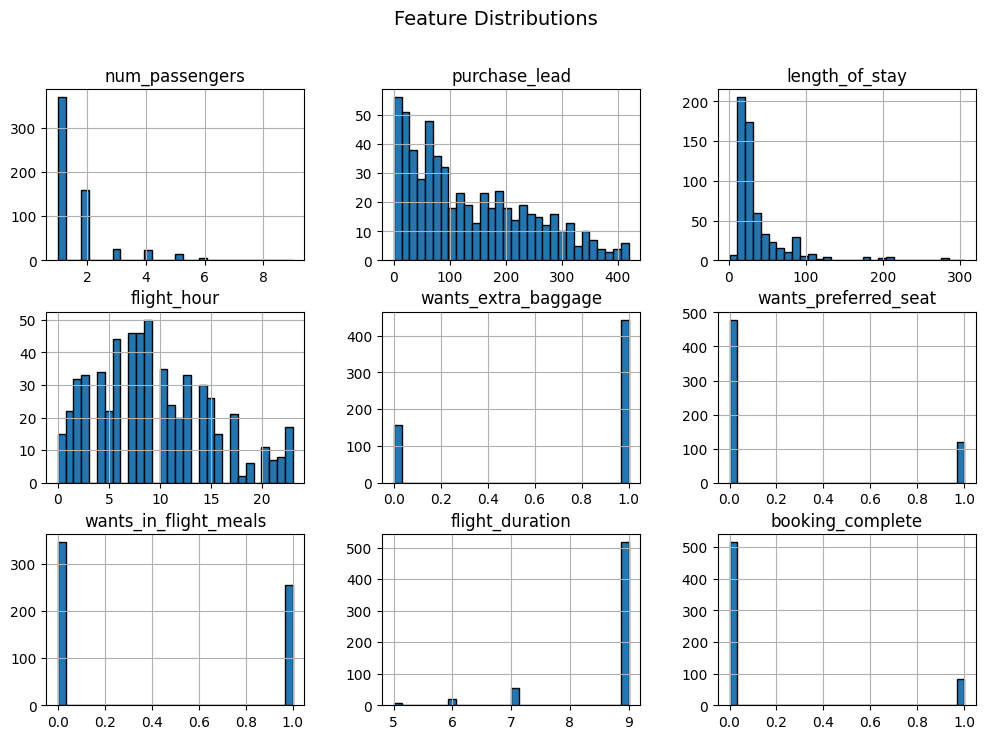

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

#this shows the histograms of the features



<Figure size 1200x600 with 0 Axes>

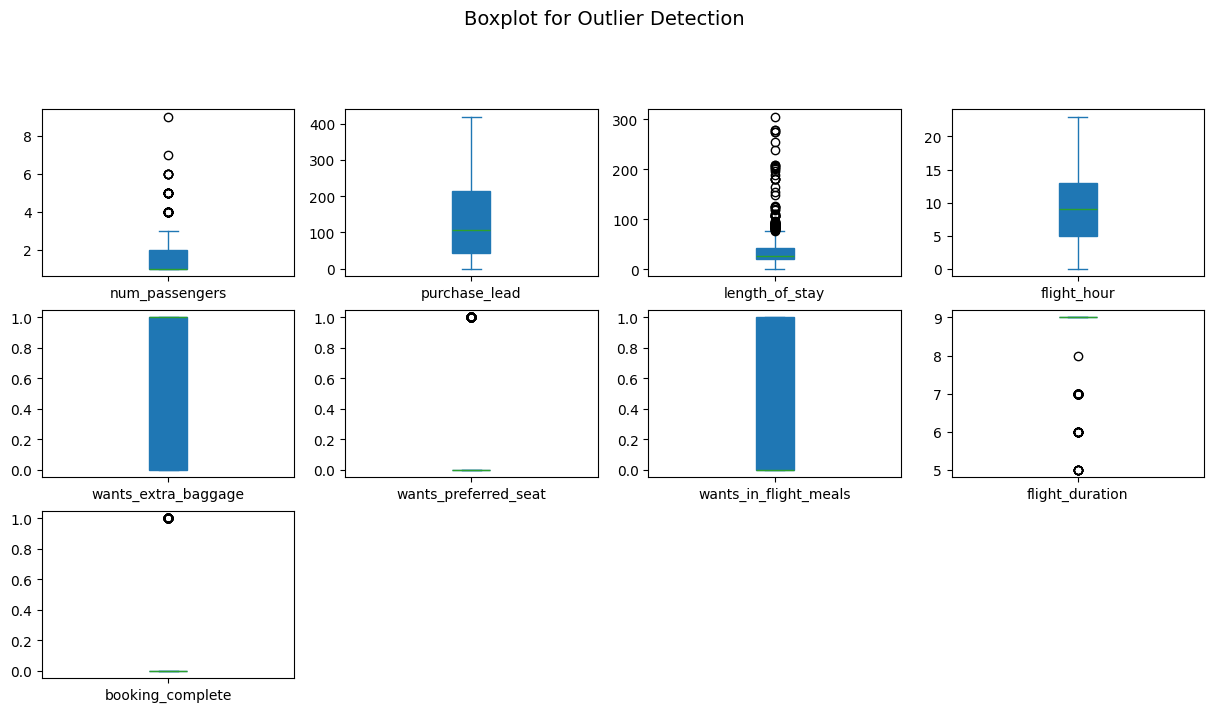

In [ ]:
plt.figure(figsize=(12, 6))
df.plot(kind="box", subplots=True, layout=(4, 4), figsize=(15, 10), patch_artist=True)
plt.suptitle("Boxplot for Outlier Detection", fontsize=14)
plt.show()
#this shows the boxplot of num_cols

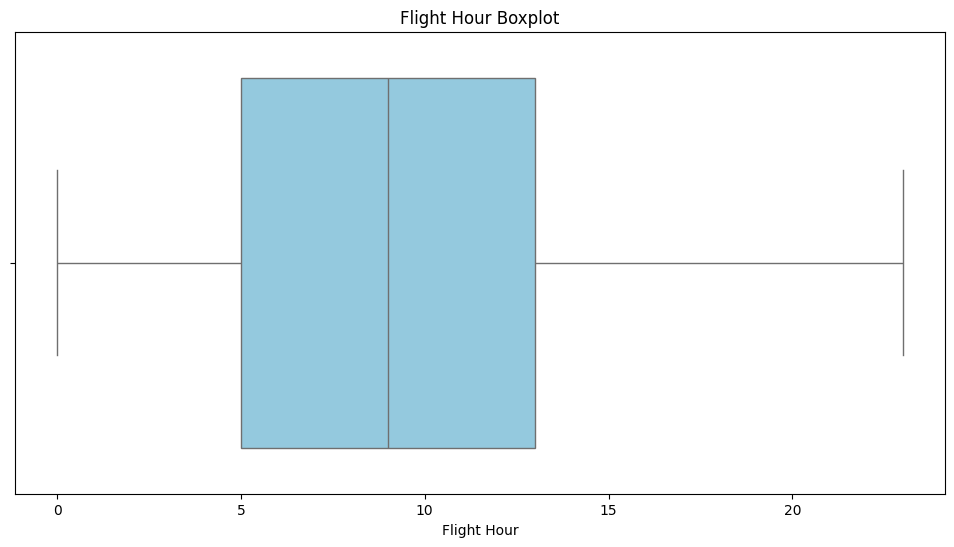

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["flight_hour"], color="skyblue")
plt.title("Flight Hour Boxplot")
plt.xlabel("Flight Hour")
plt.show()


Peaks in early morning and late-night flights suggest popular travel times.
Outliers indicate less popular flight times (midnight, very early morning, or afternoon).

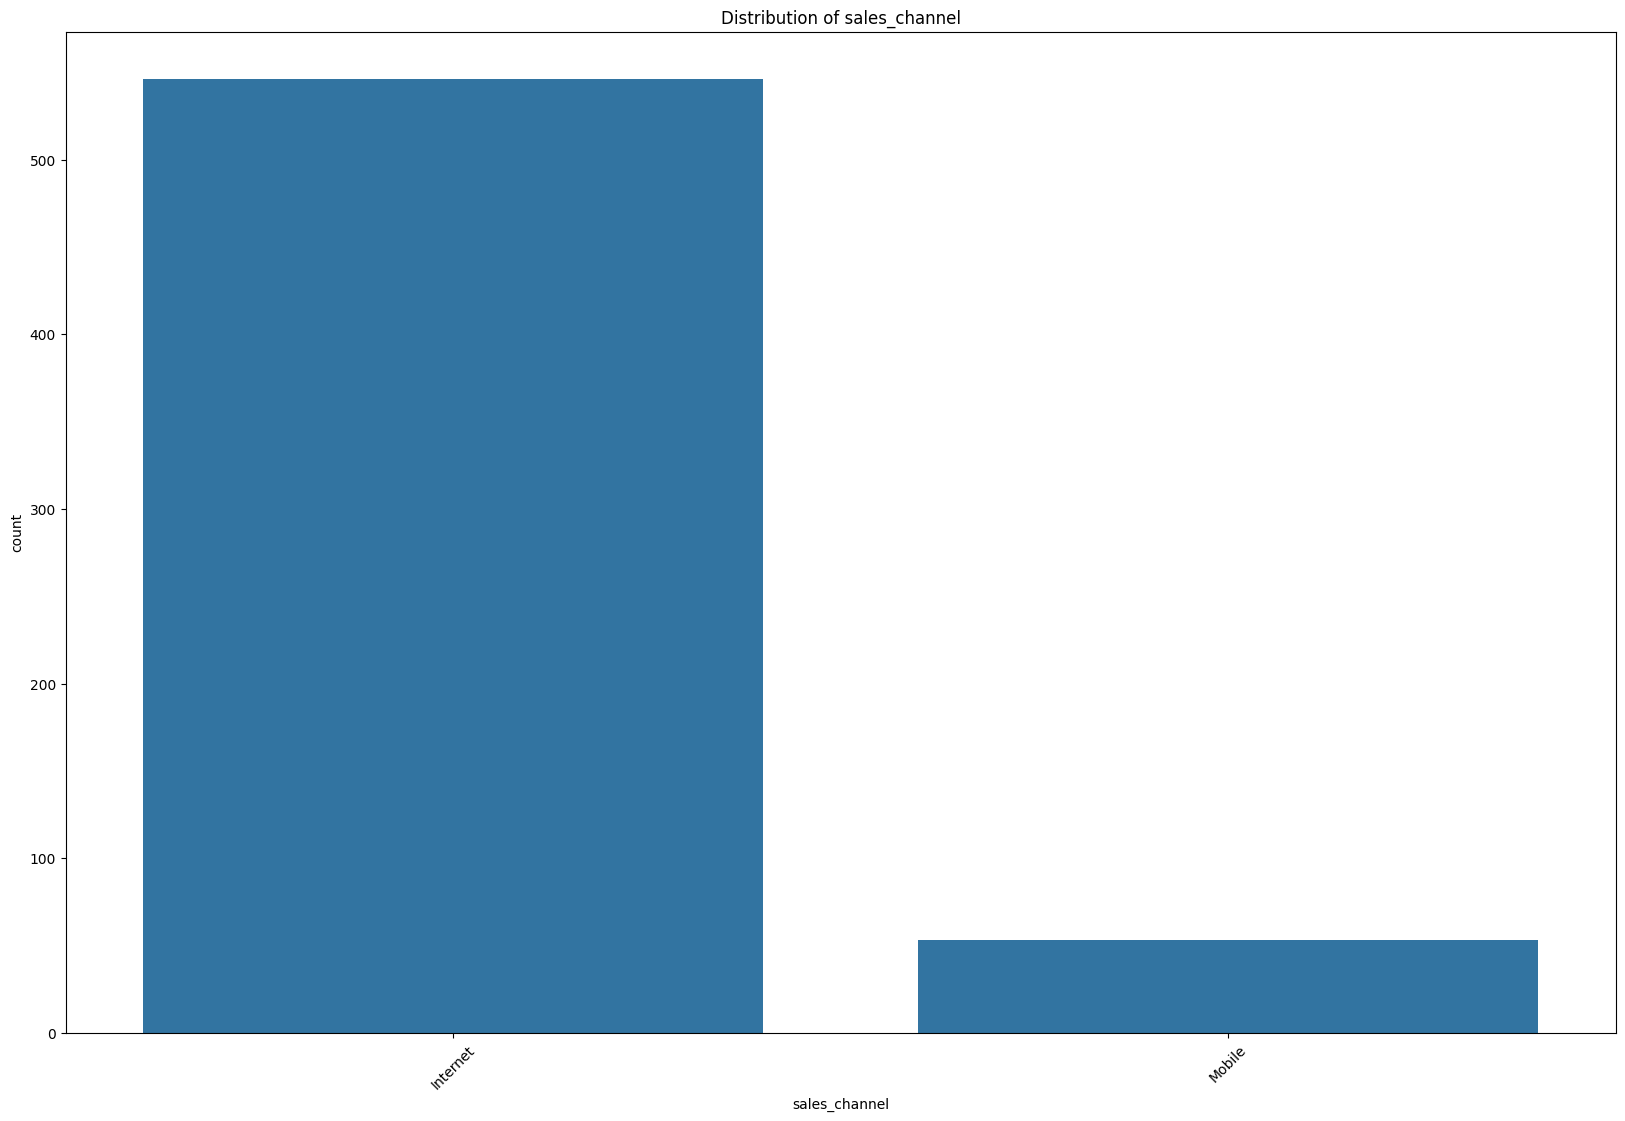

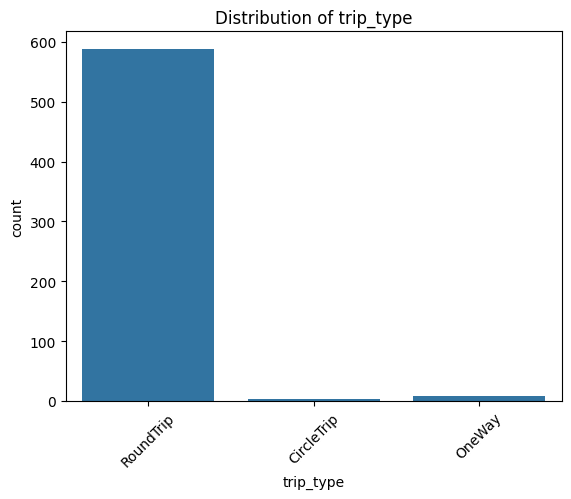

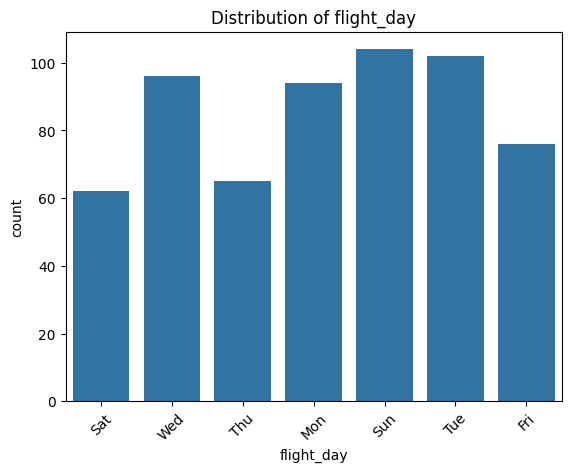

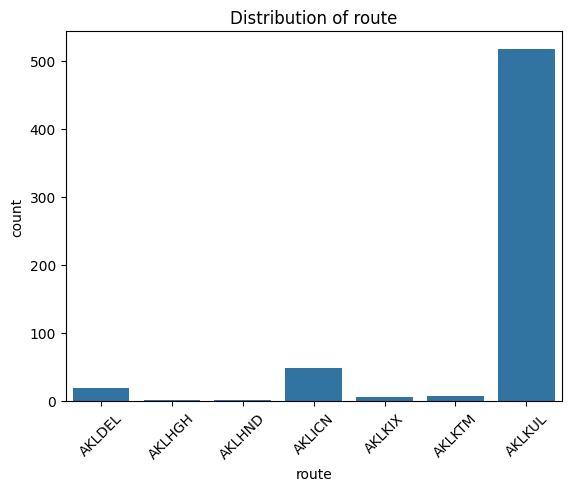

c:\Users\Sumit Emmanuel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


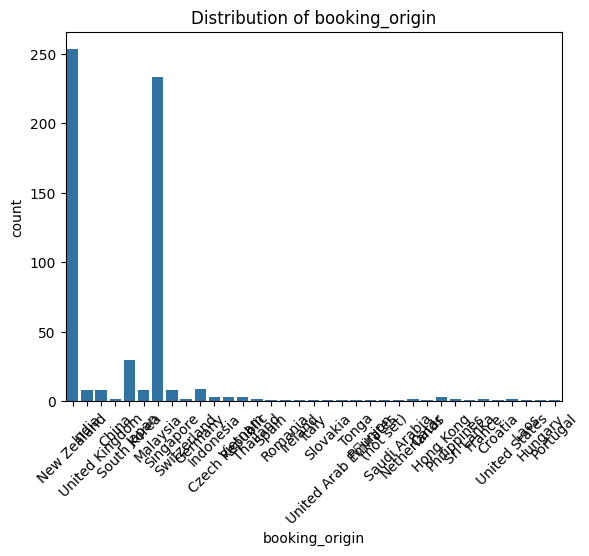

In [ ]:
plt.figure(figsize=(20, 13))
for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

    #this displays the countplots of the categorical_cols


In [21]:
# Drop the target column (booking_complete) as it's not needed for clustering
df = df.drop(columns=["booking_complete"], errors="ignore")


<Figure size 1500x800 with 0 Axes>

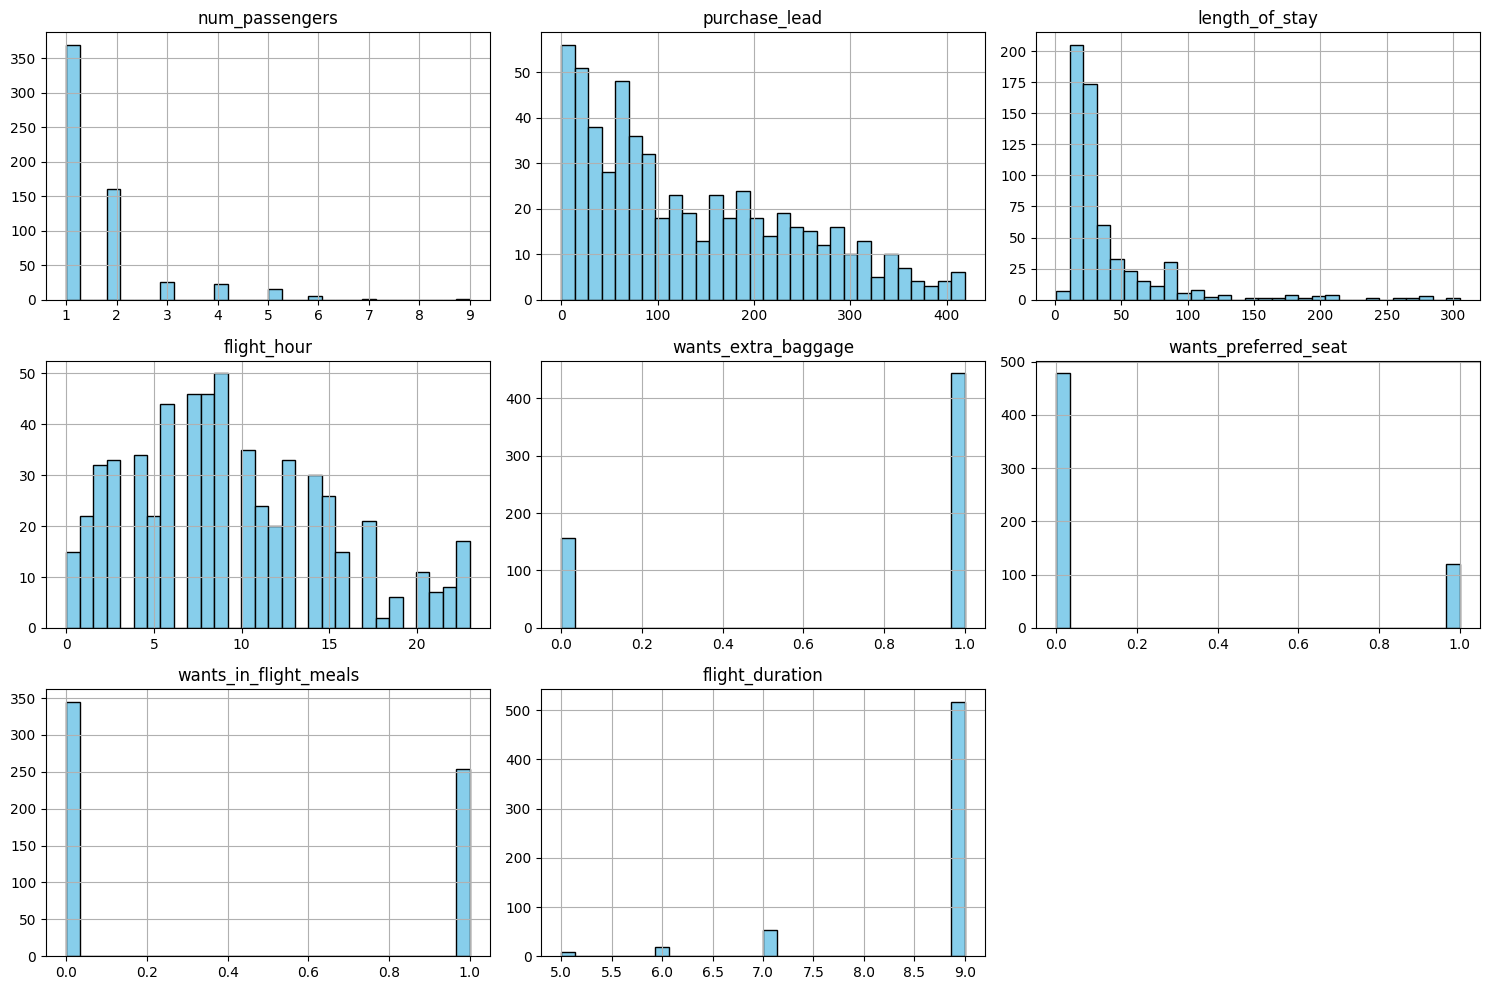

In [ ]:
plt.figure(figsize=(15, 8))
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()
#This shows the Bar Charts of all the Numerical Columns

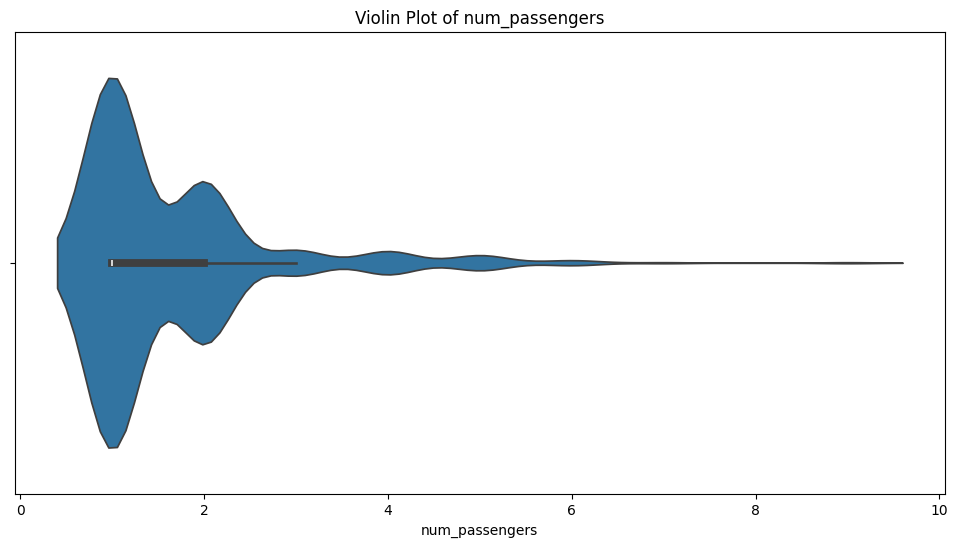

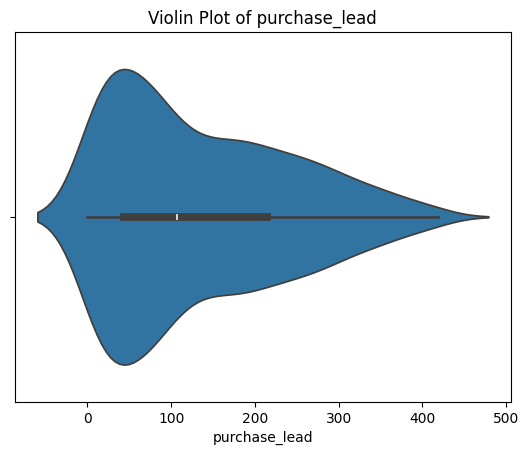

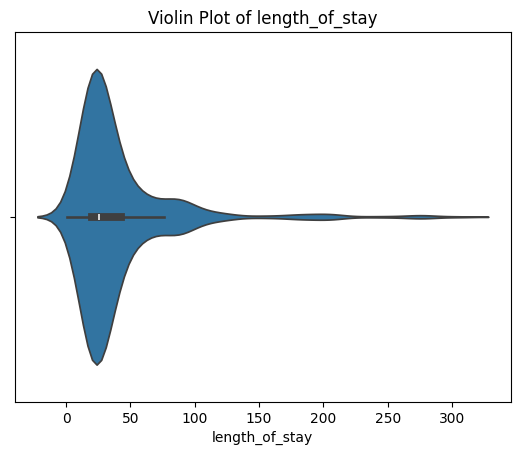

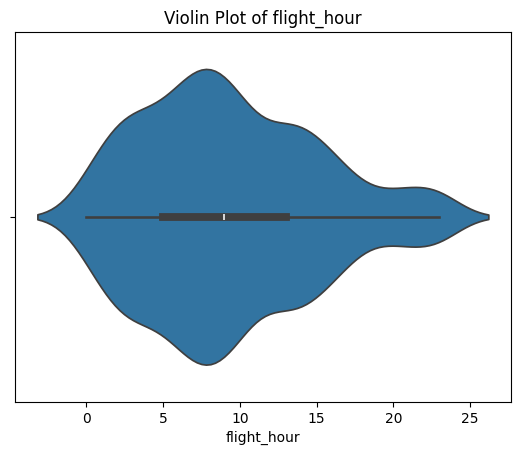

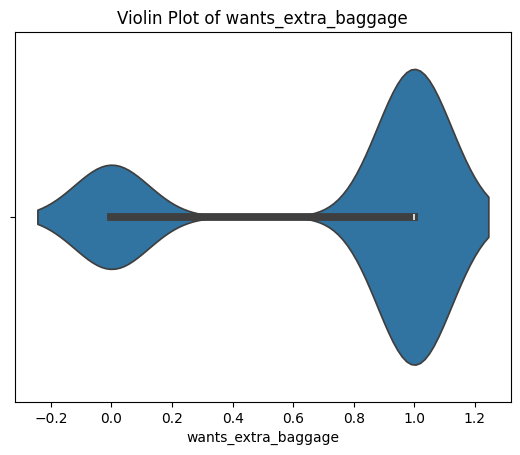

In [ ]:
plt.figure(figsize=(12, 6))
for col in df.select_dtypes(include=["number"]).columns[:5]:  # Limiting to first 5 numerical columns
    sns.violinplot(x=df[col])
    plt.title(f"Violin Plot of {col}")
    plt.show()

#This displays Vilolin plot all the numerical columns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   num_passengers         599 non-null    int64 
 1   sales_channel          599 non-null    object
 2   trip_type              599 non-null    object
 3   purchase_lead          599 non-null    int64 
 4   length_of_stay         599 non-null    int64 
 5   flight_hour            599 non-null    int64 
 6   flight_day             599 non-null    object
 7   route                  599 non-null    object
 8   booking_origin         599 non-null    object
 9   wants_extra_baggage    599 non-null    int64 
 10  wants_preferred_seat   599 non-null    int64 
 11  wants_in_flight_meals  599 non-null    int64 
 12  flight_duration        599 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 61.0+ KB


Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ["sales_channel", "trip_type", "flight_day", "route", "booking_origin"]

# Apply One-Hot Encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)  
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))


df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)


df_encoded.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,...,booking_origin_South Korea,booking_origin_Spain,booking_origin_Sri Lanka,booking_origin_Switzerland,booking_origin_Thailand,booking_origin_Tonga,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam
0,2,262,19,7,1,0,0,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,112,20,3,0,0,0,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,243,22,17,1,1,0,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,96,31,4,0,0,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,68,22,15,1,0,1,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This ensures equal weight for all categories and prevents the model from assuming an order in the categorical data.

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Standardizing the numerical features
scaler = StandardScaler()
num_cols = ["num_passengers", "purchase_lead", "length_of_stay", "flight_hour", 
            "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"]
df_scaled = scaler.fit_transform(df_encoded[num_cols])

# Updating the DataFrame with scaled values
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)

Elbow Method

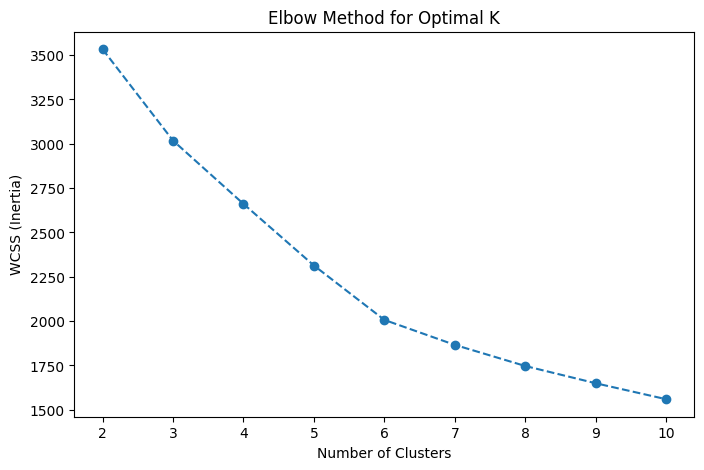

In [42]:
# Elbow Method
wcss = []
K_range = range(2, 11)  # Checking from 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

The "elbow" point in the graph is where the WCSS stops decreasing significantly.
This gives us the best K value (e.g., K=5 or K=6).

In [ ]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Add the cluster labels back to the original dataset
df_encoded["Cluster"] = df_scaled["Cluster"]


In [44]:
# Running K-Means with the chosen K (let's assume K=4 based on Elbow Method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Add the cluster labels back to the original dataset
df_encoded["Cluster"] = df_scaled["Cluster"]

Silhoutte Score

In [45]:
silhouette_avg = silhouette_score(df_scaled[num_cols], df_scaled["Cluster"])
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.2645


A score of 0.26 is relatively low, indicating that clusters are not well-separated.
There might be overlapping clusters or the data might not naturally form distinct groups.
K-Means is partially working

Davies-Bouldin Index (DBI)

In [46]:
dbi_score = davies_bouldin_score(df_scaled[num_cols], df_scaled["Cluster"])
print(f'Davies-Bouldin Index: {dbi_score:.4f}')


Davies-Bouldin Index: 1.3476


A DBI of 1.34 suggests that clusters are moderately overlapping and not very distinct.
Typically, DBI < 1 is ideal, so 1.34 is not terrible, but not great either.
This suggests some clusters are too close to each other or too spread out.

Overall Interpretation

 Moderate clustering performance

Clusters exist, but they are not well-separated.
Silhouette Score (0.26) suggests overlapping clusters.
DBI (1.34) confirms that the clusters are not very compact.
The dataset may have noise, or K-Means may not be the best algorithm.

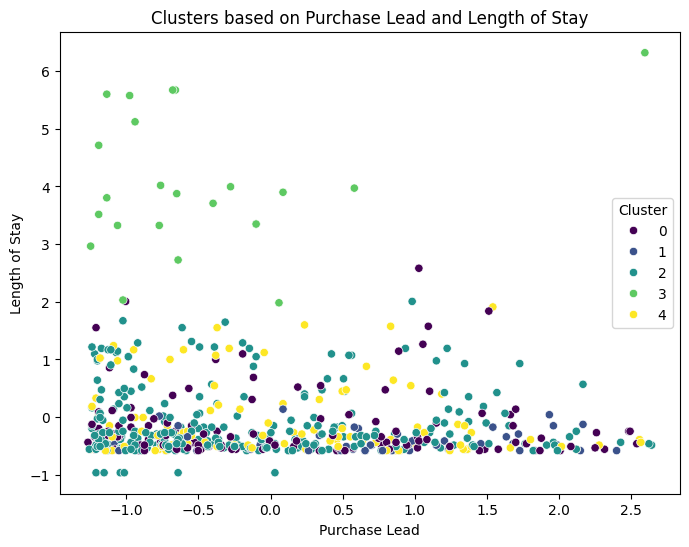

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["purchase_lead"], y=df_scaled["length_of_stay"], hue=df_scaled["Cluster"], palette="viridis")
plt.xlabel("Purchase Lead")
plt.ylabel("Length of Stay")
plt.title("Clusters based on Purchase Lead and Length of Stay")
plt.legend(title="Cluster")
plt.show()
